In this file, I will preprocess the data. Since there's no missing data, this file will be mainly about various way of handling outliers. All of the preprocessed dataframe will be fitted with model to see which treatment is the best.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from scipy import stats
from scipy.stats import norm

In [2]:
df=pd.read_csv('winequality.csv')

In [3]:
def pencilan (x):
    IQR=x.describe()['75%']-x.describe()['25%']
    batasAtas=x.describe()['75%']+(1.5*IQR)
    batasBawah=x.describe()['25%']-(1.5*IQR)
    pencilan=[i for i in x if i>batasAtas or i<batasBawah]
    return pencilan

In [4]:
kolom=df.columns

In [5]:
outliers=[]

for i in kolom:
    outliers.append([i,len(pencilan(df[i]))])
pd.DataFrame(outliers, columns=['Nama Kolom', 'Jumlah Outlier'])

Nama Kolom  Jumlah Outlier
0          fixed acidity              49
1       volatile acidity              19
2            citric acid               1
3         residual sugar             155
4              chlorides             112
5    free sulfur dioxide              30
6   total sulfur dioxide              55
7                density              45
8                     pH              35
9              sulphates              59
10               alcohol              13
11               quality              28

# drop outliers

In [6]:
#function to define range of the data with IQR method
def IQR (x):
    IQR=x.describe()['75%']-x.describe()['25%']
    batasAtas=x.describe()['75%']+(1.5*IQR)
    batasBawah=x.describe()['25%']-(1.5*IQR)
    return batasAtas, batasBawah

In [7]:
df2=df.copy()

In [8]:
# dropping outliers
for i in kolom:
    batasAtas, batasBawah=IQR(df2[f'{i}'])
    df2=df2[(df2[f'{i}']>batasBawah) & (df2[f'{i}']<batasAtas)]

In [9]:
#checking normality, since normal distribution is one of indicator for outliers existence

normal=[]
for i in kolom:
    k2, p=stats.normaltest(df2[f'{i}'])
    if p>0.05:
        result='normal'
    else:
        result='not normal'
    normal.append([k2,p, result])

pd.DataFrame(normal, index=kolom, columns=['k2', 'p-value', 'distribution'])

k2       p-value distribution
fixed acidity          91.649659  1.254670e-20   not normal
volatile acidity       15.479519  4.351761e-04   not normal
citric acid           161.412146  8.908362e-36   not normal
residual sugar         70.305428  5.412156e-16   not normal
chlorides               5.328567  6.964923e-02       normal
free sulfur dioxide    93.700312  4.500240e-21   not normal
total sulfur dioxide  118.165675  2.191037e-26   not normal
density                 2.326830  3.124174e-01       normal
pH                      6.531417  3.816989e-02   not normal
sulphates              51.981014  5.157820e-12   not normal
alcohol                89.493327  3.687831e-20   not normal
quality                31.506078  1.440596e-07   not normal

In [11]:
df2['quality'].value_counts()

5    490
6    472
7    130
4     32
Name: quality, dtype: int64

Drop outliers will cause data 'quality' 3 and 8 missing from the data frame.

In [12]:
df2.to_csv('df_dropoutlier.csv')

# rescale

In [13]:
df3=df.copy()

In [14]:
#rescaling data by transforming it with square root

for i in list(df3.columns):
    df3[f'{i}']=[(x**0.5) for x in df[f'{i}']]

In [15]:
normal=[]
for i in list(df3.columns):
    k2, p=stats.normaltest(df3[f'{i}'])
    if p>0.05:
        result='normal'
    else:
        result='not normal'
    normal.append([k2,p, result])

pd.DataFrame(normal, index=kolom, columns=['k2', 'p-value', 'distribution'])

k2        p-value distribution
fixed acidity          114.401330   1.439020e-25   not normal
volatile acidity         4.286611   1.172666e-01       normal
citric acid            128.068116   1.550108e-28   not normal
residual sugar        1047.314496  3.789193e-228   not normal
chlorides             1298.917891  8.781401e-283   not normal
free sulfur dioxide     60.570731   7.034495e-14   not normal
total sulfur dioxide    93.275837   5.564284e-21   not normal
density                 30.516818   2.362420e-07   not normal
pH                      22.727413   1.160927e-05   not normal
sulphates              541.256757  2.934867e-118   not normal
alcohol                124.045514   1.158401e-27   not normal
quality                 15.294394   4.773804e-04   not normal

In [16]:
df3.to_csv('df_sqrt.csv')

In [17]:
df4=df.copy()

In [18]:
#rescaling data by transforming it with log (x+1). +1 is needed to avoid error, since log 0 is not defined.

for i in list(df4.columns):
    df4[f'{i}']=[np.log(x+1) for x in df[f'{i}']]

In [19]:
normal=[]
for i in list(df4.columns):
    k2, p=stats.normaltest(df4[f'{i}'])
    if p>0.05:
        result='normal'
    else:
        result='not normal'
    normal.append([k2,p, result])

pd.DataFrame(normal, index=kolom, columns=['k2', 'p-value', 'distribution'])

k2        p-value distribution
fixed acidity           52.133866   4.778316e-12   not normal
volatile acidity        21.023263   2.721802e-05   not normal
citric acid            433.144199   8.788853e-95   not normal
residual sugar         782.401021  1.269922e-170   not normal
chlorides             1644.008261   0.000000e+00   not normal
free sulfur dioxide     71.622836   2.800908e-16   not normal
total sulfur dioxide    79.122826   6.587137e-18   not normal
density                 30.516799   2.362443e-07   not normal
pH                      19.335381   6.329587e-05   not normal
sulphates              561.722630  1.055554e-122   not normal
alcohol                107.983648   3.561629e-24   not normal
quality                 48.154113   3.495161e-11   not normal

In [20]:
df4.to_csv('df_log.csv')

# Robust Scaler

In [21]:
# Transforming with robust scaler
kolom=list(df.columns)
kolom.pop()
df5=pd.DataFrame(RobustScaler().fit_transform(df.drop('quality',axis=1)), columns=kolom)
df5['quality']=df['quality']
df5.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.238095              0.72    -0.787879       -0.428571      -0.15   
1      -0.047619              1.44    -0.787879        0.571429       0.95   
2      -0.047619              0.96    -0.666667        0.142857       0.65   
3       1.571429             -0.96     0.909091       -0.428571      -0.20   
4      -0.238095              0.72    -0.787879       -0.428571      -0.15   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.214286                -0.100  0.469799  1.052632  -0.333333   
1             0.785714                 0.725  0.022371 -0.578947   0.333333   
2             0.071429                 0.400  0.111857 -0.263158   0.166667   
3             0.214286                 0.550  0.559284 -0.789474  -0.222222   
4            -0.214286                -0.100  0.469799  1.052632  -0.333333   

   alcohol  quality  
0    -0.50        5  
1    -0.25        5  
2    -0.25        5  
3    -0.25        6  
4    -0.50        5

In [30]:
normal=[]
for i in list(df5.columns):
    k2, p=stats.normaltest(df5[f'{i}'])
    if p>0.05:
        result='normal'
    else:
        result='not normal'
    normal.append([k2,p, result])

pd.DataFrame(normal, index=df5.columns, columns=['k2', 'p-value', 'distribution'])

k2        p-value distribution
fixed acidity          224.530878   1.752828e-49   not normal
volatile acidity       143.419344   7.192589e-32   not normal
citric acid            152.039215   9.662822e-34   not normal
residual sugar        1520.323970   0.000000e+00   not normal
chlorides             1783.105923   0.000000e+00   not normal
free sulfur dioxide    342.259148   4.779365e-75   not normal
total sulfur dioxide   487.427256  1.433891e-106   not normal
density                 30.707750   2.147320e-07   not normal
pH                      33.684697   4.846865e-08   not normal
sulphates              906.894448  1.175907e-197   not normal
alcohol                154.178070   3.316329e-34   not normal
quality                 17.262401   1.784503e-04   not normal

In [22]:
df5.to_csv('df_rbscal.csv')

# Check linear regression assumptions

In [23]:
def linear_regression_assumptions(features, label, feature_names=None):
    """
    Tests a linear regression on the model to see if assumptions are being met
    """
    from sklearn.linear_model import LinearRegression
    
    # Setting feature names to x1, x2, x3, etc. if they are not defined
    if feature_names is None:
        feature_names = ['X'+str(feature+1) for feature in range(features.shape[1])]
    
    print('Fitting linear regression')
    # Multi-threading if the dataset is a size where doing so is beneficial
    if features.shape[0] < 100000:
        model = LinearRegression(n_jobs=-1)
    else:
        model = LinearRegression()
        
    model.fit(features, label)
    
    # Returning linear regression R^2 and coefficients before performing diagnostics
    r2 = model.score(features, label)
    print()
    print('R^2:', r2, '\n')
    print('Coefficients')
    print('-------------------------------------')
    print('Intercept:', model.intercept_)
    
    for feature in range(len(model.coef_)):
        print('{0}: {1}'.format(feature_names[feature], model.coef_[feature]))

    print('\nPerforming linear regression assumption testing')
    
    # Creating predictions and calculating residuals for assumption tests
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    
    def linear_assumption():
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
        # Plotting the diagonal line
        line_coords = np.arange(df_results.min().min(), df_results.max().max())
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term')
        
        
    def normal_errors_assumption(p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
               
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        print('\n=======================================================================================')
        print('Assumption 2: The error terms are normally distributed')
        print()
    
        print('Using the Anderson-Darling test for normal distribution')

        # Performing the test on the residuals
        p_value = normal_ad(df_results['Residuals'])[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
    
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(df_results['Residuals'])
        plt.show()
    
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
        else:
            print('Assumption not satisfied')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
        
        
    def multicollinearity_assumption():
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        print('\n=======================================================================================')
        print('Assumption 3: Little to no multicollinearity among predictors')
        
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
        plt.title('Correlation of Variables')
        plt.show()
        
        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
       
        # Gathering the VIF for each variable
        VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(feature_names[idx], vif))
        
        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
        definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
        print()
        print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
        print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
        print()

        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        
        
    def autocorrelation_assumption():
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson
        print('\n=======================================================================================')
        print('Assumption 4: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(df_results['Residuals'])
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')

            
    def homoscedasticity_assumption():
        """
        Homoscedasticity: Assumes that the errors exhibit constant variance
        """
        print('\n=======================================================================================')
        print('Assumption 5: Homoscedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroscedasticity is apparent, confidence intervals and predictions will be affected') 
    linear_assumption()
    normal_errors_assumption()
    multicollinearity_assumption()
    autocorrelation_assumption()
    homoscedasticity_assumption()


Fitting linear regression

R^2: 0.360551703038688 

Coefficients
-------------------------------------
Intercept: 21.965208449448753
X1: 0.024990552671673816
X2: -1.083590258693442
X3: -0.182563948410716
X4: 0.016331269765475283
X5: -1.8742251580991993
X6: 0.004361333309096438
X7: -0.003264579703068482
X8: -17.881163832496153
X9: -0.41365314382176166
X10: 0.9163344127211326
X11: 0.2761976992268871

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


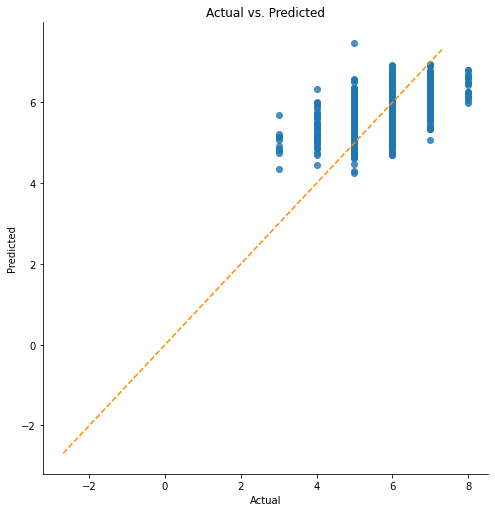

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.175144776315279e-10
Residuals are not normally distributed


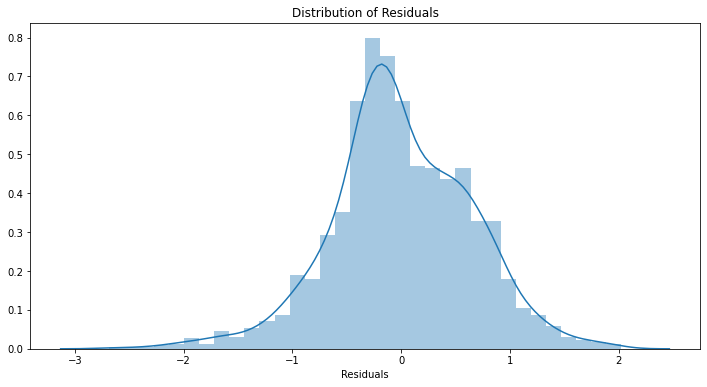


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


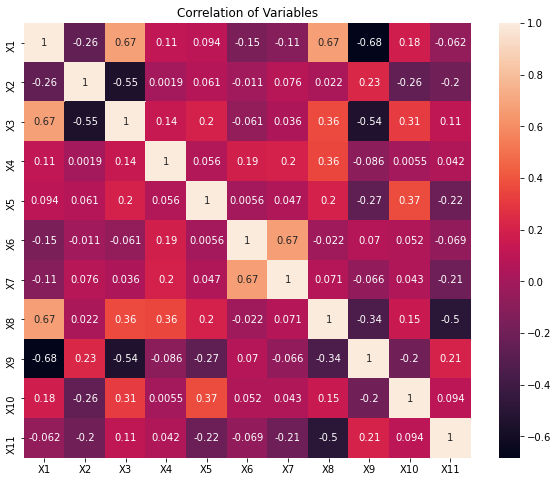

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 74.45226538735389
X2: 17.060026123932275
X3: 9.183495167192477
X4: 4.662992174051856
X5: 6.5548772185559905
X6: 6.442682022072097
X7: 6.519698942374763
X8: 1479.2872086341736
X9: 1070.9676853792205
X10: 21.5906209233164
X11: 124.39486649768077

6 cases of possible multicollinearity
3 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.7571401888792892
Little to no autocorrelation 

Assumption satisfied


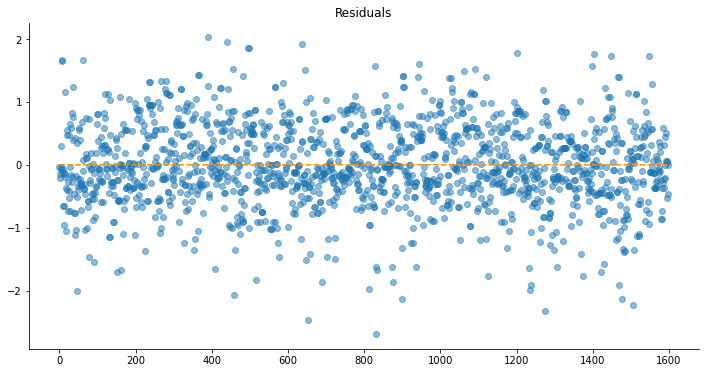

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [24]:
# Unprocessed data
linear_regression_assumptions(df.drop('quality',axis=1).values, df['quality'].values)

Fitting linear regression

R^2: 0.3745748542678192 

Coefficients
-------------------------------------
Intercept: 13.344116196505835
X1: 0.018075455407888907
X2: -0.8158810215425784
X3: -0.3363843770647522
X4: 0.009644859234609518
X5: -1.1807444781826884
X6: 0.0028680157952801766
X7: -0.002265386215782761
X8: -9.44828836073015
X9: -0.5277512559377124
X10: 1.8194635581621383
X11: 0.26991705301016616

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


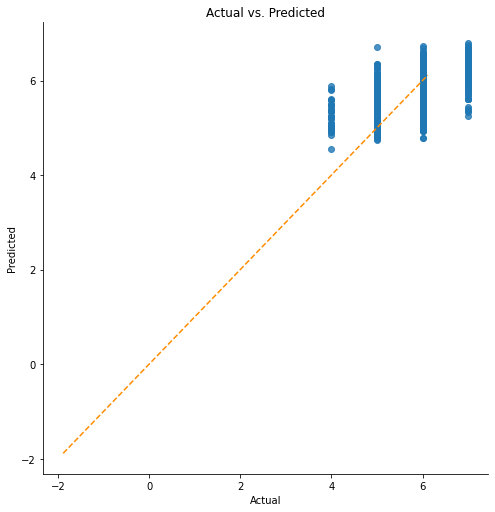

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.606177277398768e-08
Residuals are not normally distributed


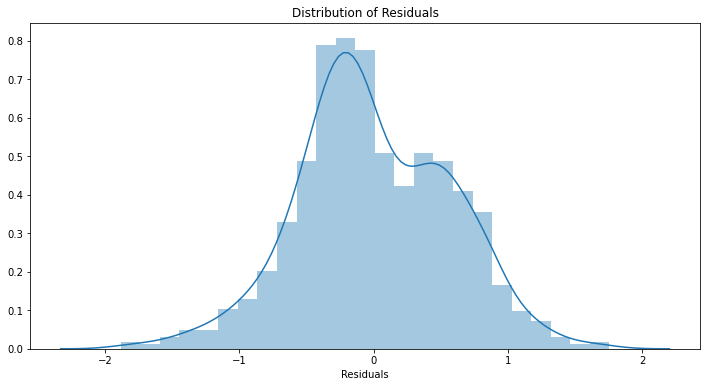


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


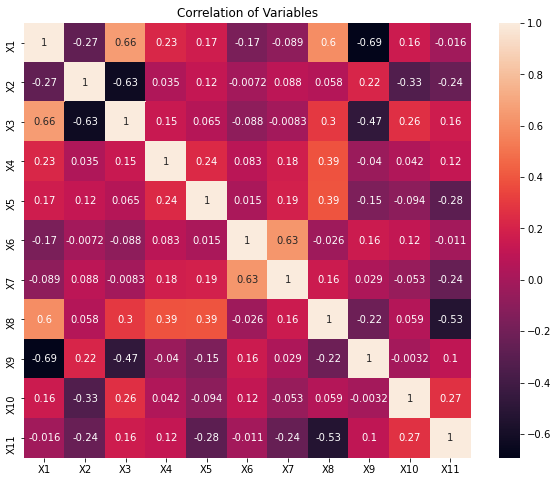

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 106.48656638819
X2: 22.33651129131385
X3: 8.852914388286047
X4: 32.13529502398525
X5: 41.253274250034174
X6: 7.554822030461997
X7: 7.884406040743685
X8: 1997.1246520485056
X9: 1410.9063844869124
X10: 40.56723541172042
X11: 163.10431535822963

8 cases of possible multicollinearity
4 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.6289398711585101
Little to no autocorrelation 

Assumption satisfied

A

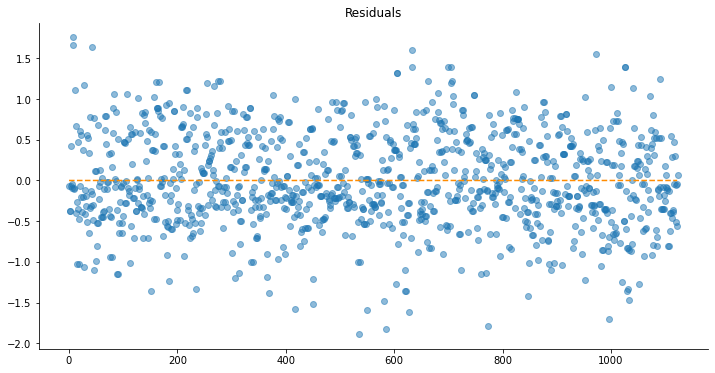

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [25]:
# drop outliers

linear_regression_assumptions(df2.drop('quality',axis=1).values, df2['quality'].values)

Fitting linear regression

R^2: 0.3541761207959171 

Coefficients
-------------------------------------
Intercept: 8.683031363065172
X1: 0.029333585641772065
X2: -0.32477032155490304
X3: -0.031916053353570756
X4: 0.012983776624578464
X5: -0.3176826940490663
X6: 0.010583692568895936
X7: -0.010009785208664246
X8: -6.93327023200382
X9: -0.32127241482626856
X10: 0.36334435442979385
X11: 0.35918488979188906

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


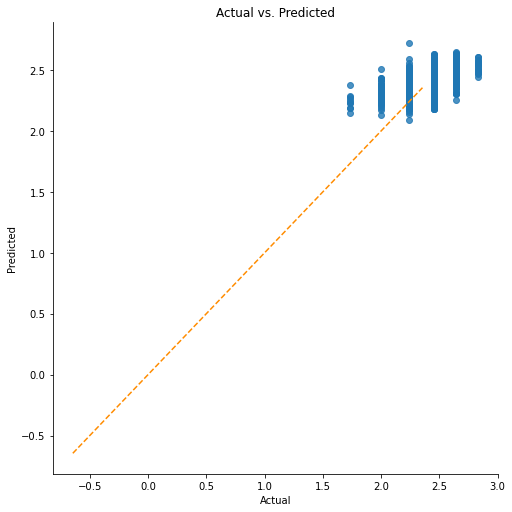

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 3.2284296226183277e-14
Residuals are not normally distributed


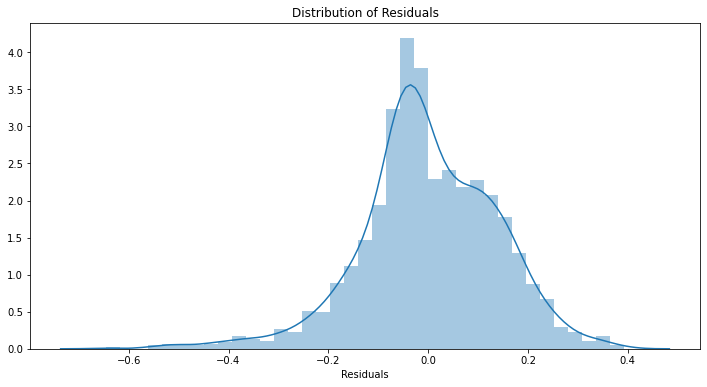


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


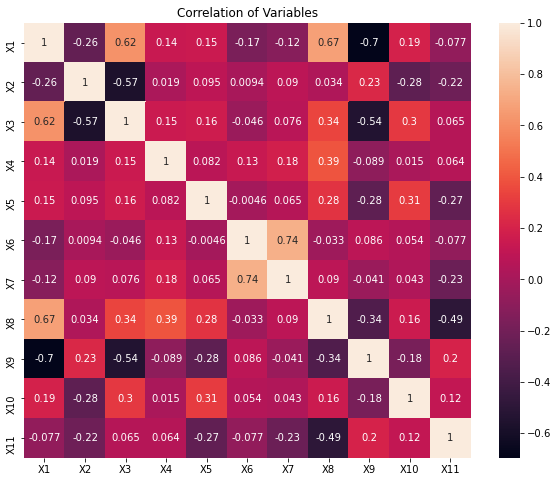

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 269.6487711789546
X2: 63.58770761712468
X3: 13.923607343003418
X4: 24.779824518903876
X5: 36.232918045998815
X6: 24.34847709864472
X7: 25.22856577086015
X8: 6145.5423968923005
X9: 4338.5446429850945
X10: 94.31972499085015
X11: 521.8872453164647

11 cases of possible multicollinearity
4 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.7611080250122784
Little to no autocorrelation 

Assumption satisfie

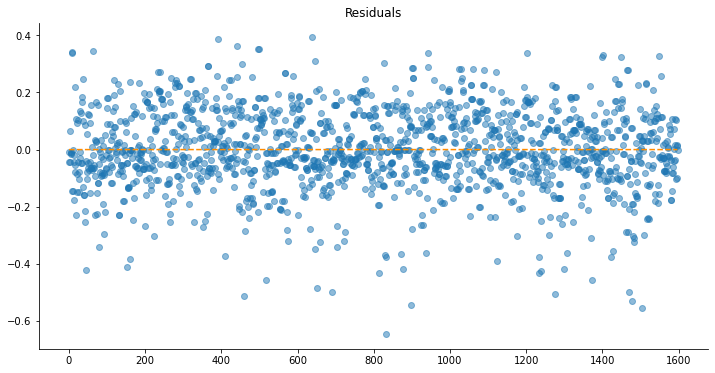

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [26]:
# rescale with square root

linear_regression_assumptions(df3.drop('quality',axis=1).values, df3['quality'].values)

Fitting linear regression

R^2: 0.3468239975545908 

Coefficients
-------------------------------------
Intercept: 5.327370711344182
X1: 0.05895234314745816
X2: -0.2749831998132381
X3: -0.06366608768999096
X4: 0.010097914947043714
X5: -0.31584382290544427
X6: 0.01615433332767341
X7: -0.02012607116051217
X8: -6.2510712633334915
X9: -0.2288282155846919
X10: 0.26708755400879347
X11: 0.4622173085784622

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


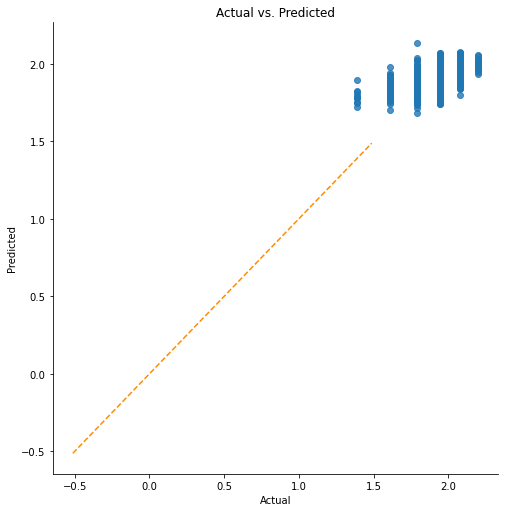

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.8838523241696264e-17
Residuals are not normally distributed


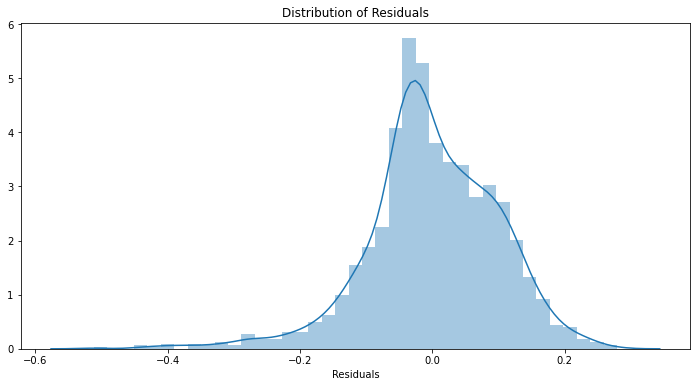


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


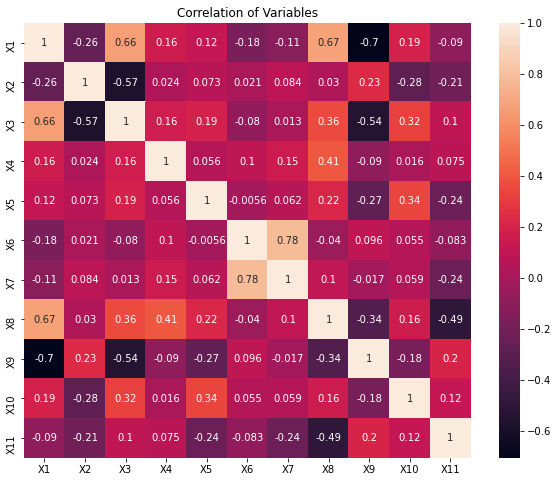

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 497.15169529244156
X2: 26.0135575185247
X3: 9.999324069020632
X4: 23.550485308217624
X5: 7.885902462702931
X6: 53.928587673676475
X7: 92.75678201182936
X8: 6762.056590483245
X9: 4012.774332215378
X10: 39.609116748697616
X11: 964.6343098906733

9 cases of possible multicollinearity
4 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.7639271671978507
Little to no autocorrelation 

Assumption satisfied



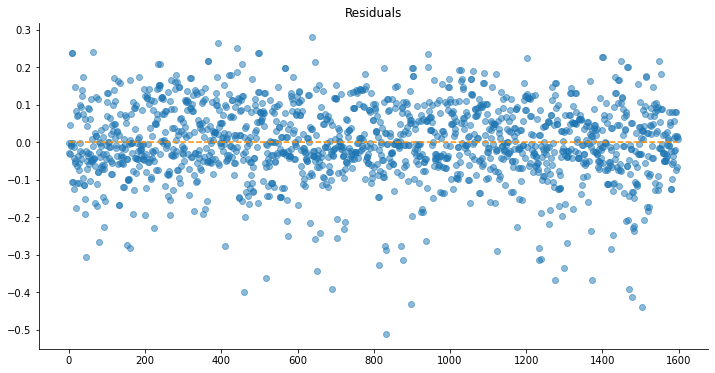

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [27]:
# rescale with log

linear_regression_assumptions(df4.drop('quality',axis=1).values, df4['quality'].values)

Fitting linear regression

R^2: 0.3605517030386881 

Coefficients
-------------------------------------
Intercept: 5.569671809963333
X1: 0.052480160610513235
X2: -0.2708975646733586
X3: -0.060246102975535745
X4: 0.01143188883583314
X5: -0.03748450316198287
X6: 0.061058666327352844
X7: -0.13058318812274225
X8: -0.03996440116562794
X9: -0.07859409732613311
X10: 0.1649401942898025
X11: 0.4419163187630133

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


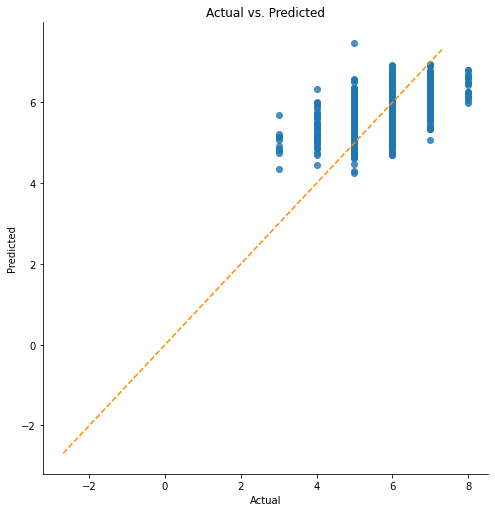

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.175144776315279e-10
Residuals are not normally distributed


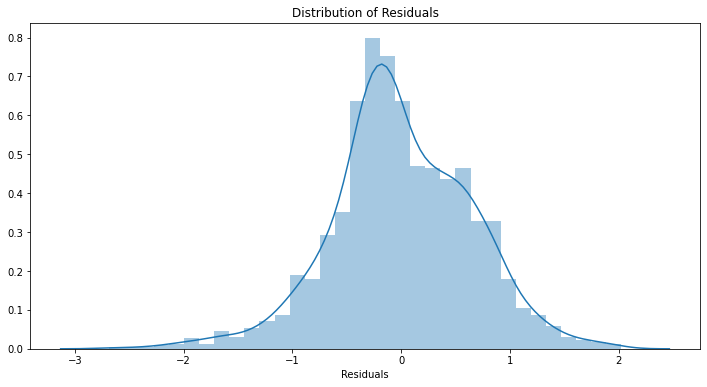


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


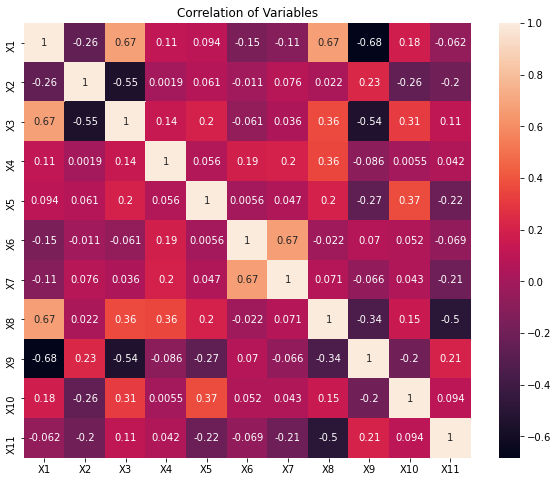

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 5.711997653619474
X2: 1.7925504604582854
X3: 2.991682340103763
X4: 1.6111409786774518
X5: 1.4428542374883242
X6: 2.012652764185179
X7: 2.148661879112736
X8: 5.250172075666465
X9: 2.789817528284288
X10: 1.4540954701124484
X11: 3.0880764201499775

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.7571401888792908
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


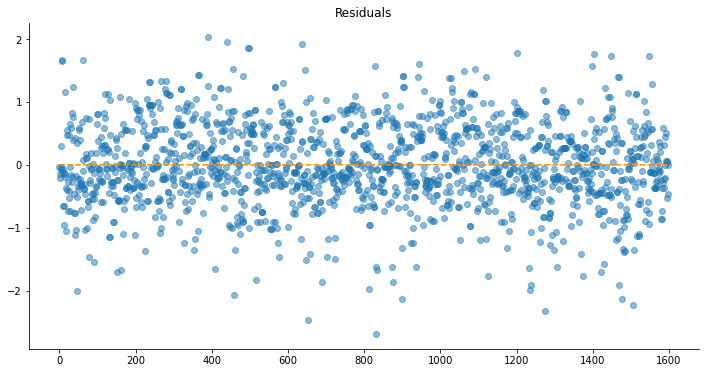

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [28]:
# transform with robust scaler

linear_regression_assumptions(df5.drop('quality',axis=1).values, df5['quality'].values)

__All dataframe do not fulfill linear regression assumptions__. The data is not linear, the residuals are not normally distributed  and there are multicolinearity (execpt for robust scaler). Therefore, normal linear regression should not be used. In model selection, i will still using linear regression model as a benchmark.